In [1]:
############# Explore Beaufort Shelfbreak Tair and Pair #############
# The purpose of this script is to explore the air temperature 
# and pressure conditions in a box on the Beaufort Sea shelfbreak 
# jet so use as inputs for the idealized mode. Pair will be 
# collapsed to one value for all time. Tair will be a timeseries 
# that is an idealized version of the data. This analysis will be 
# based on ERA5 data.
#
# Notes:
# -
#
######################################################################

In [2]:
# Load in the packages
import xarray as xr
import numpy as np
import cartopy
import glob
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings
import numpy as np
from netCDF4 import Dataset
import datetime
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import xroms
from matplotlib import ticker
crs = ccrs.PlateCarree()
warnings.filterwarnings("ignore") 
#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

from xhistogram.xarray import histogram

In [3]:
# Load in the air temperature data
era5_air_temp = xr.open_dataset('/pscratch/sd/b/bundzis/Beaufort_ROMS_2020_dvd_myroms_ice_scratch/External_data/ERA5_data/temp_2m_era5_2017_2024.nc')
era5_air_temp

<xarray.Dataset> Size: 454MB
Dimensions:     (valid_time: 70128, longitude: 77, latitude: 21)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Data variables:
    t2m         (valid_time, latitude, longitude) float32 454MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.5.0 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Thu Aug 07 08:21:21 2025: cdo mergetime temp_2m_...
    CDO:                     Climate Data Operators version 2.5.0 (https://mp...

In [4]:
# Load in the air pressure data
era5_air_pres = xr.open_dataset('/pscratch/sd/b/bundzis/Beaufort_ROMS_2020_dvd_myroms_ice_scratch/External_data/ERA5_data/mean_sea_level_pres_era5_2017_2024.nc')
era5_air_pres

<xarray.Dataset> Size: 454MB
Dimensions:     (valid_time: 70128, longitude: 77, latitude: 21)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Data variables:
    msl         (valid_time, latitude, longitude) float32 454MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.5.0 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Thu Aug 07 08:20:42 2025: cdo mergetime mean_sea...
    CDO:                     Climate Data Operators version 2.5.0 (https://mp...

In [5]:
era5_air_temp.t2m

<xarray.DataArray 't2m' (valid_time: 70128, latitude: 21, longitude: 77)> Size: 454MB
[113396976 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                2 metre temperature
    units:                                    K
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1617
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                2 metre temperature
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    GRIB_surface:                             0.0

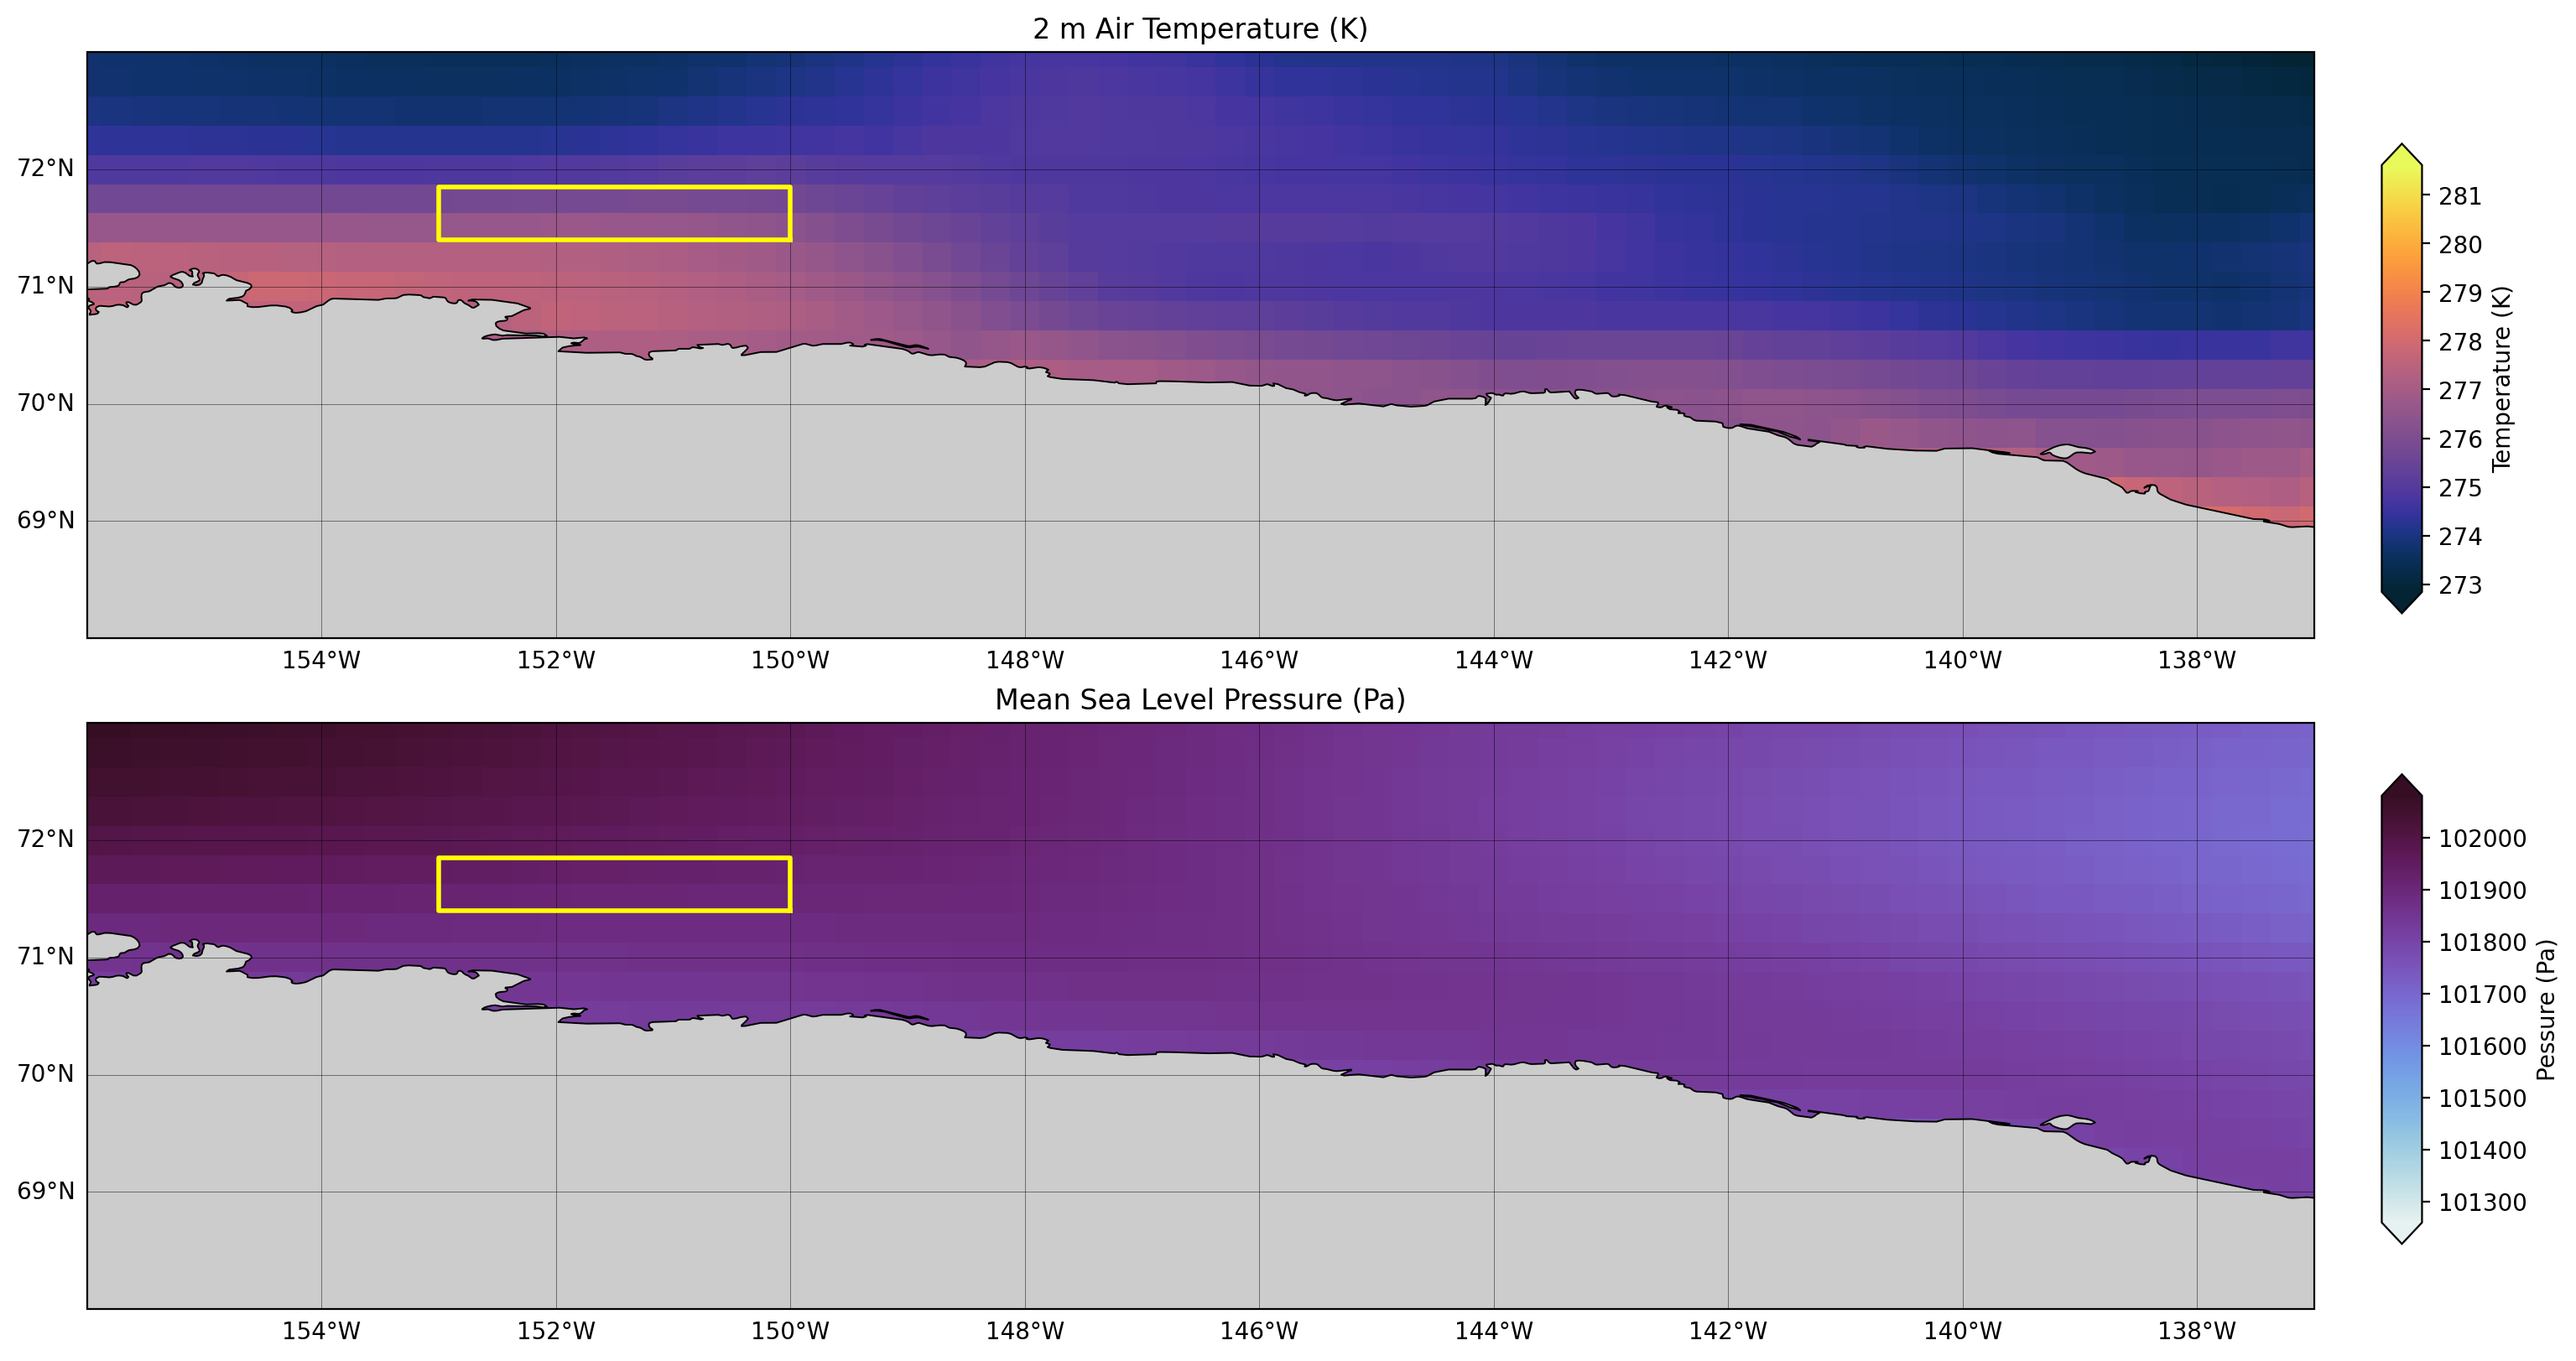

In [6]:
# Plot the region that the data covers
# Box 1

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_air_temp.t2m.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.thermal, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[0].set_title('2 m Air Temperature (K)')
# Make a colorbar 
cbar_ax1 = fig.add_axes([0.94,0.55,0.015,0.35])
fig.colorbar(m1,ax=ax,extend='both',
             label='Temperature (K)',
             pad=0.03, cax=cbar_ax1)

# Plot surface u at 2019-09-15
m2 = era5_air_pres.msl.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.dense, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[1].set_title('Mean Sea Level Pressure (Pa)')
# Make a colorbar 
cbar_ax2 = fig.add_axes([0.94,0.08,0.015,0.35])
fig.colorbar(m2,ax=ax,extend='both',
             label='Pessure (Pa)',
             pad=0.03, cax=cbar_ax2)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 1
box_min_lon_01 = -150
box_max_lon_01 = -153
box_min_lat_01 = 71.4
box_max_lat_01 = 71.85
# Plot Box 1
ax[0].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)

fig.canvas.draw()
 


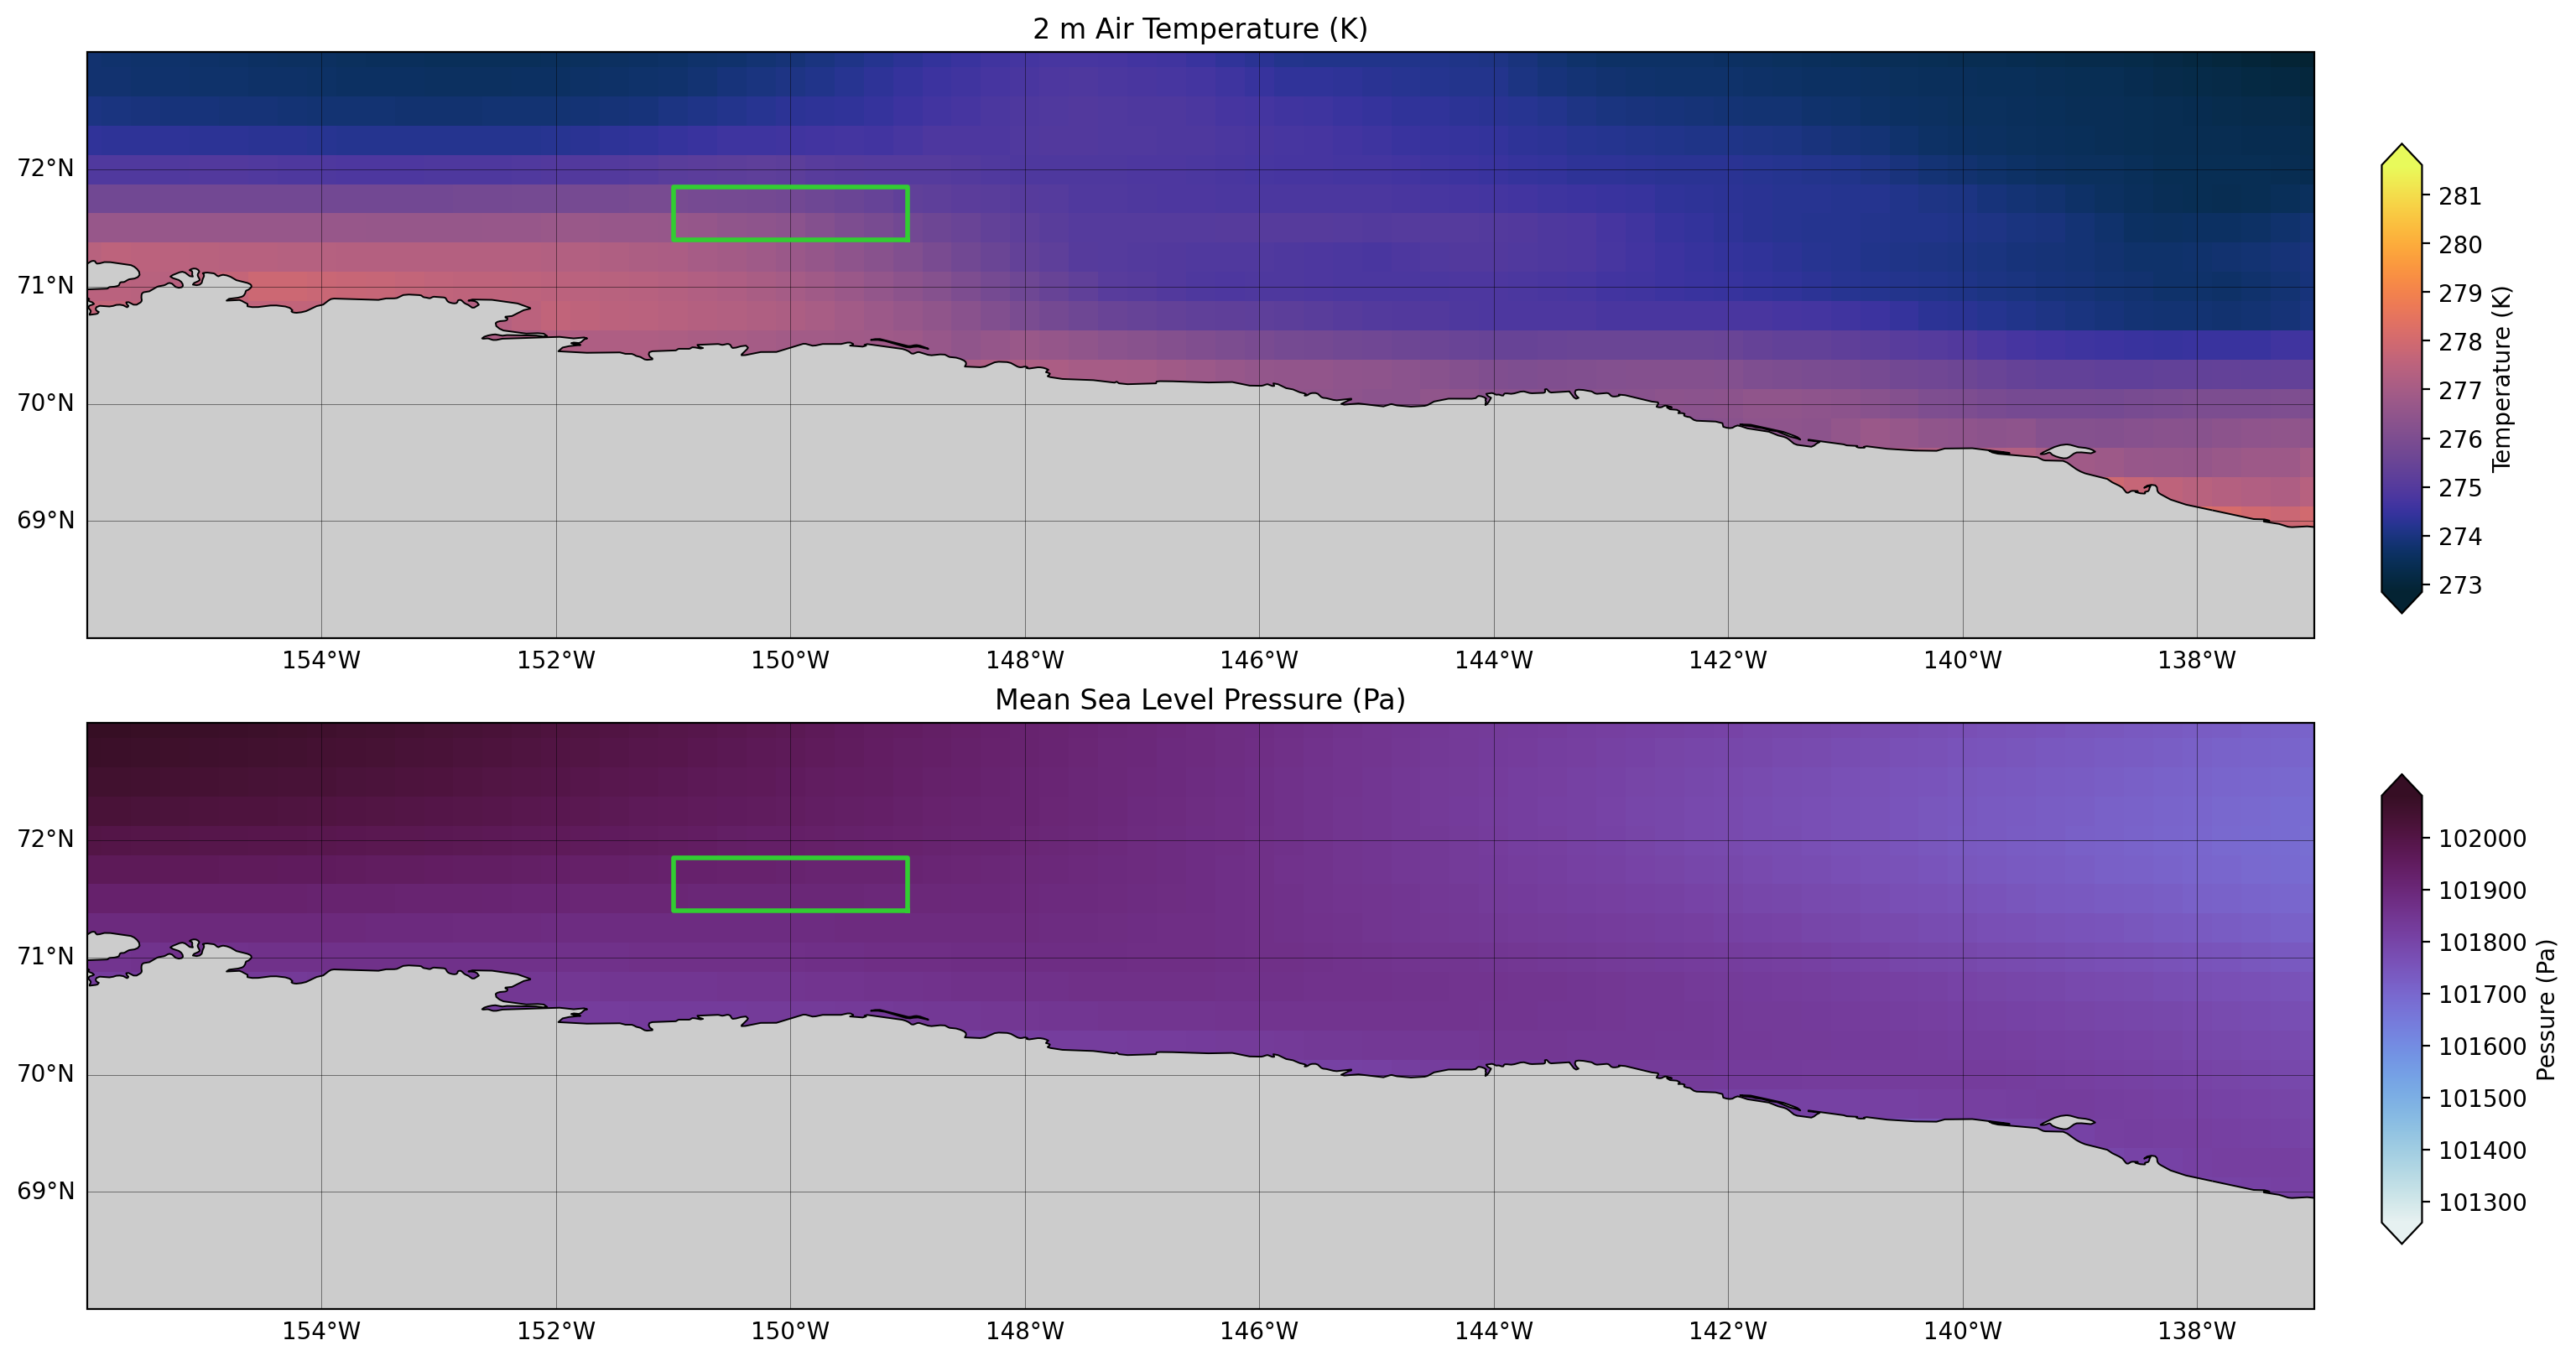

In [7]:
# Plot the region that the data covers
# Box 2

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_air_temp.t2m.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.thermal, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[0].set_title('2 m Air Temperature (K)')
# Make a colorbar 
cbar_ax1 = fig.add_axes([0.94,0.55,0.015,0.35])
fig.colorbar(m1,ax=ax,extend='both',
             label='Temperature (K)',
             pad=0.03, cax=cbar_ax1)

# Plot surface u at 2019-09-15
m2 = era5_air_pres.msl.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.dense, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[1].set_title('Mean Sea Level Pressure (Pa)')
# Make a colorbar 
cbar_ax2 = fig.add_axes([0.94,0.08,0.015,0.35])
fig.colorbar(m2,ax=ax,extend='both',
             label='Pessure (Pa)',
             pad=0.03, cax=cbar_ax2)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 2
box_min_lon_02 = -149
box_max_lon_02 = -151
box_min_lat_02 = 71.4
box_max_lat_02 = 71.85
# Plot Box 2
ax[0].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)

fig.canvas.draw()

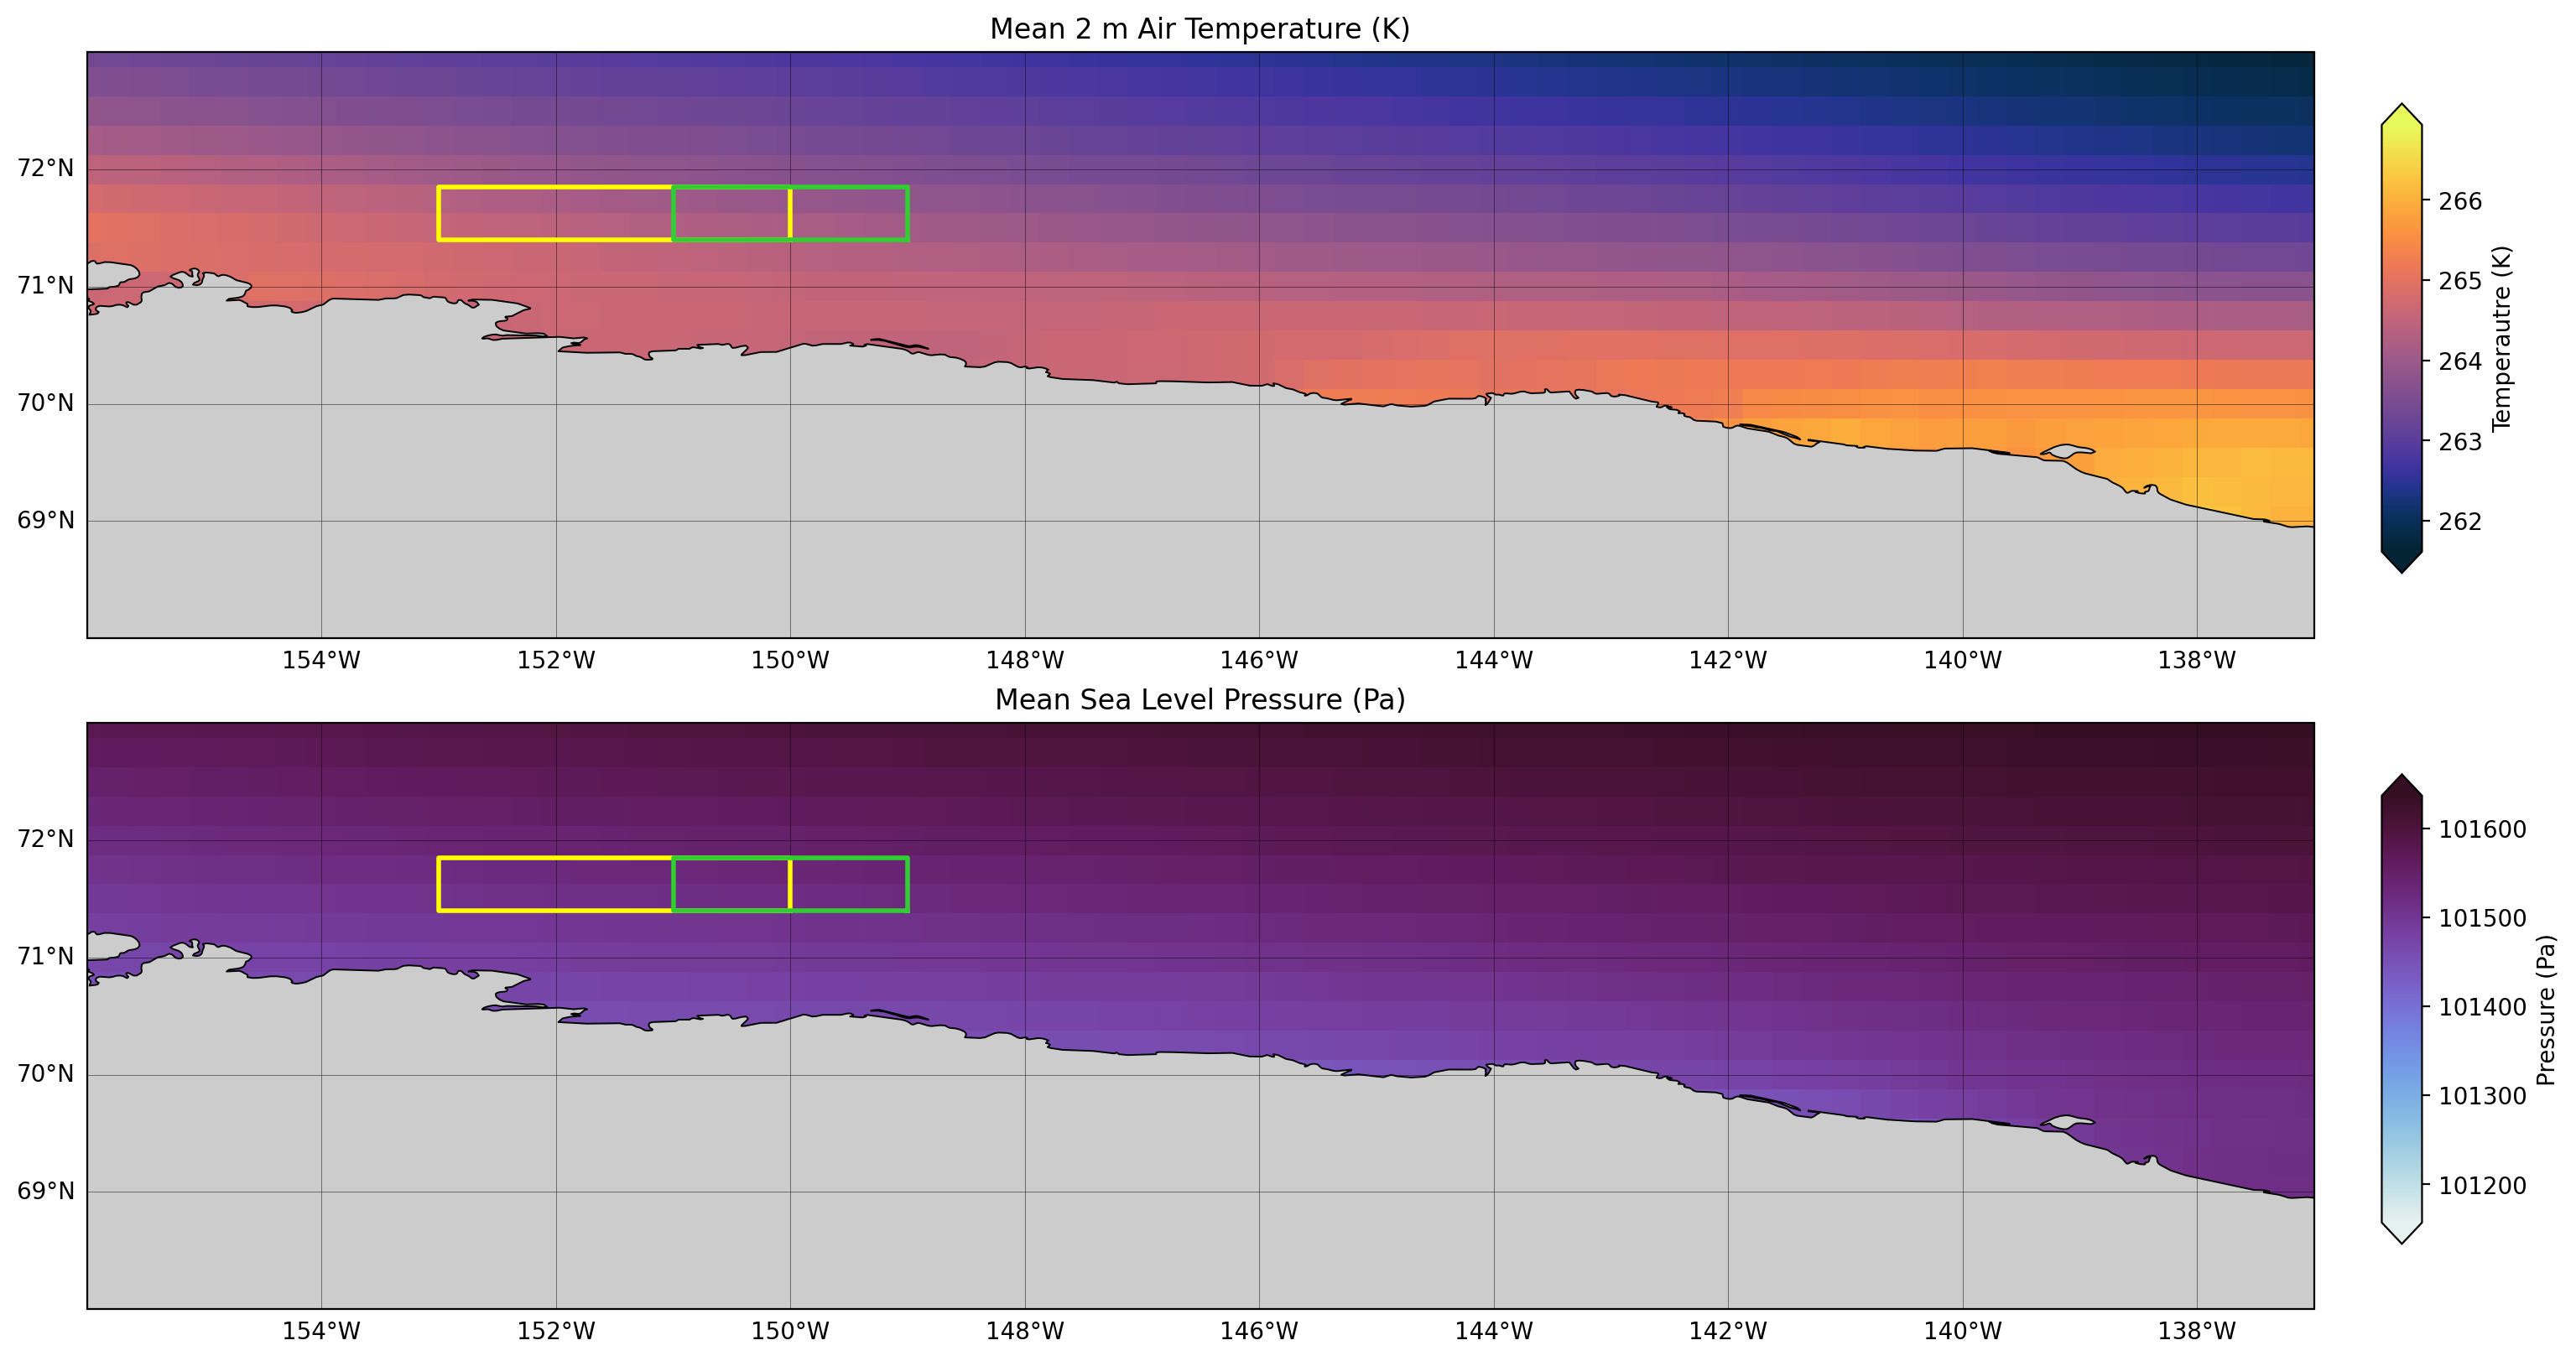

In [8]:
# Plot means
# Put both boxes

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_air_temp.t2m.mean(dim='valid_time').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.thermal, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[0].set_title('Mean 2 m Air Temperature (K)')

# Plot surface u at 2019-09-15
m2 = era5_air_pres.msl.mean(dim='valid_time').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.dense, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[1].set_title('Mean Sea Level Pressure (Pa)')


# Make a colorbar for each plot
# Longwave
cbar_ax1 = fig.add_axes([0.94,0.58,0.015,0.35])
fig.colorbar(m1,ax=ax,extend='both',
             label='Temperautre (K)',
             pad=0.03, cax=cbar_ax1)
# Shortwave
cbar_ax2 = fig.add_axes([0.94,0.08,0.015,0.35])
fig.colorbar(m2,ax=ax,extend='both',
             label='Pressure (Pa)',
             pad=0.03, cax=cbar_ax2)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 1
box_min_lon_01 = -150
box_max_lon_01 = -153
box_min_lat_01 = 71.4
box_max_lat_01 = 71.85
# Plot Box 1
ax[0].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)
# Box 2
box_min_lon_02 = -149
box_max_lon_02 = -151
box_min_lat_02 = 71.4
box_max_lat_02 = 71.85
# Plot Box 2
ax[0].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)

fig.canvas.draw()

In [9]:
print('ERA5 air temp min: ', era5_air_temp.t2m.min().values)
print('ERA5 air temp max: ', era5_air_temp.t2m.max().values)
print('ERA5 air temp mean: ', era5_air_temp.t2m.mean().values)
print('ERA5 air temp stddev: ', era5_air_temp.t2m.std().values)
print('ERA5 air pres min: ', era5_air_pres.msl.min().values)
print('ERA5 air pres max: ', era5_air_pres.msl.max().values)
print('ERA5 air pres mean: ', era5_air_pres.msl.mean().values)
print('ERA5 air pres stddev: ', era5_air_pres.msl.std().values)

ERA5 air temp min:  221.46794
ERA5 air temp max:  304.6587
ERA5 air temp mean:  264.15115
ERA5 air temp stddev:  12.7454405
ERA5 air pres min:  97100.94
ERA5 air pres max:  106336.875
ERA5 air pres mean:  101471.23
ERA5 air pres stddev:  1058.293


In [10]:
# Trim to our boxes
# Convert to 360 bassed lat/lon
# Box 1
box_min_lon_01_360 = box_max_lon_01 + 360 
box_max_lon_01_360 = box_min_lon_01 + 360 
# Box 2
box_min_lon_02_360 = box_max_lon_02 + 360 
box_max_lon_02_360 = box_min_lon_02 + 360 


print('Box 1 Bounds:')
print('min_lon: ', str(box_min_lon_01) + ' (W) or ' + str(box_min_lon_01_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_01) + ' (W) or ' + str(box_max_lon_01_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_01)
print('max_lat: ', box_max_lat_01)
print('Box 2 Bounds:')
print('min_lon: ', str(box_min_lon_02) + ' (W) or ' + str(box_min_lon_02_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_02) + ' (W) or ' + str(box_max_lon_02_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_02)
print('max_lat: ', box_max_lat_02)

# Get the data in our two boxes
# Box 1
air_temp_reg1 = era5_air_temp.t2m.sel(longitude=slice(box_max_lon_01, box_min_lon_01), latitude=slice(72, 71))
air_pres_reg1 = era5_air_pres.msl.sel(longitude=slice(box_max_lon_01, box_min_lon_01), latitude=slice(72, 71))
# Box 2
air_temp_reg2 = era5_air_temp.t2m.sel(longitude=slice(box_max_lon_02, box_min_lon_02), latitude=slice(72, 71))
air_pres_reg2 = era5_air_pres.msl.sel(longitude=slice(box_max_lon_02, box_min_lon_02), latitude=slice(72, 71))

Box 1 Bounds:
min_lon:  -150 (W) or 207 (0 - 360)
max_lon:  -153 (W) or 210 (0 - 360)
min_lat:  71.4
max_lat:  71.85
Box 2 Bounds:
min_lon:  -149 (W) or 209 (0 - 360)
max_lon:  -151 (W) or 211 (0 - 360)
min_lat:  71.4
max_lat:  71.85


In [11]:
air_temp_reg1

<xarray.DataArray 't2m' (valid_time: 70128, latitude: 5, longitude: 13)> Size: 18MB
array([[[258.21133, 258.184  , ..., 257.8168 , 257.76993],
        [259.06485, 259.0082 , ..., 258.35977, 258.3129 ],
        ...,
        [259.975  , 259.91446, ..., 259.10196, 259.05118],
        [259.91446, 259.8539 , ..., 259.7133 , 259.63907]],

       [[258.22906, 258.15875, ..., 257.4693 , 257.399  ],
        [259.23492, 259.14313, ..., 258.21344, 258.14313],
        ...,
        [260.44196, 260.40875, ..., 259.4947 , 259.39508],
        [260.35797, 260.33453, ..., 260.16656, 260.0689 ]],

       ...,

       [[245.0379 , 245.04767, ..., 245.24493, 245.19025],
        [245.74298, 245.7254 , ..., 245.52814, 245.47345],
        ...,
        [246.5711 , 246.50665, ..., 245.909  , 245.8465 ],
        [246.659  , 246.58478, ..., 246.659  , 246.63751]],

       [[244.88333, 244.8931 , ..., 245.16068, 245.10208],
        [245.60208, 245.59036, ..., 245.4263 , 245.3677 ],
        ...,
        [246.46732, 246.39896, ..., 245.80325, 245.74075],
        [246.55325, 246.47513, ..., 246.52982, 246.51419]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 104B -153.0 -152.8 -152.5 ... -150.2 -150.0
  * latitude    (latitude) float64 40B 72.0 71.75 71.5 71.25 71.0
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                2 metre temperature
    units:                                    K
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1617
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                2 metre temperature
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    GRIB_surface:                             0.0

In [12]:
# Take the average over space but keep changes in time 
# Box 1 
air_temp_reg1_avg = air_temp_reg1.mean(dim=['latitude', 'longitude'])
air_pres_reg1_avg = air_pres_reg1.mean(dim=['latitude', 'longitude'])
# Box 2 
air_temp_reg2_avg = air_temp_reg2.mean(dim=['latitude', 'longitude'])
air_pres_reg2_avg = air_pres_reg2.mean(dim=['latitude', 'longitude'])

Text(0.5, 0, 'Year')

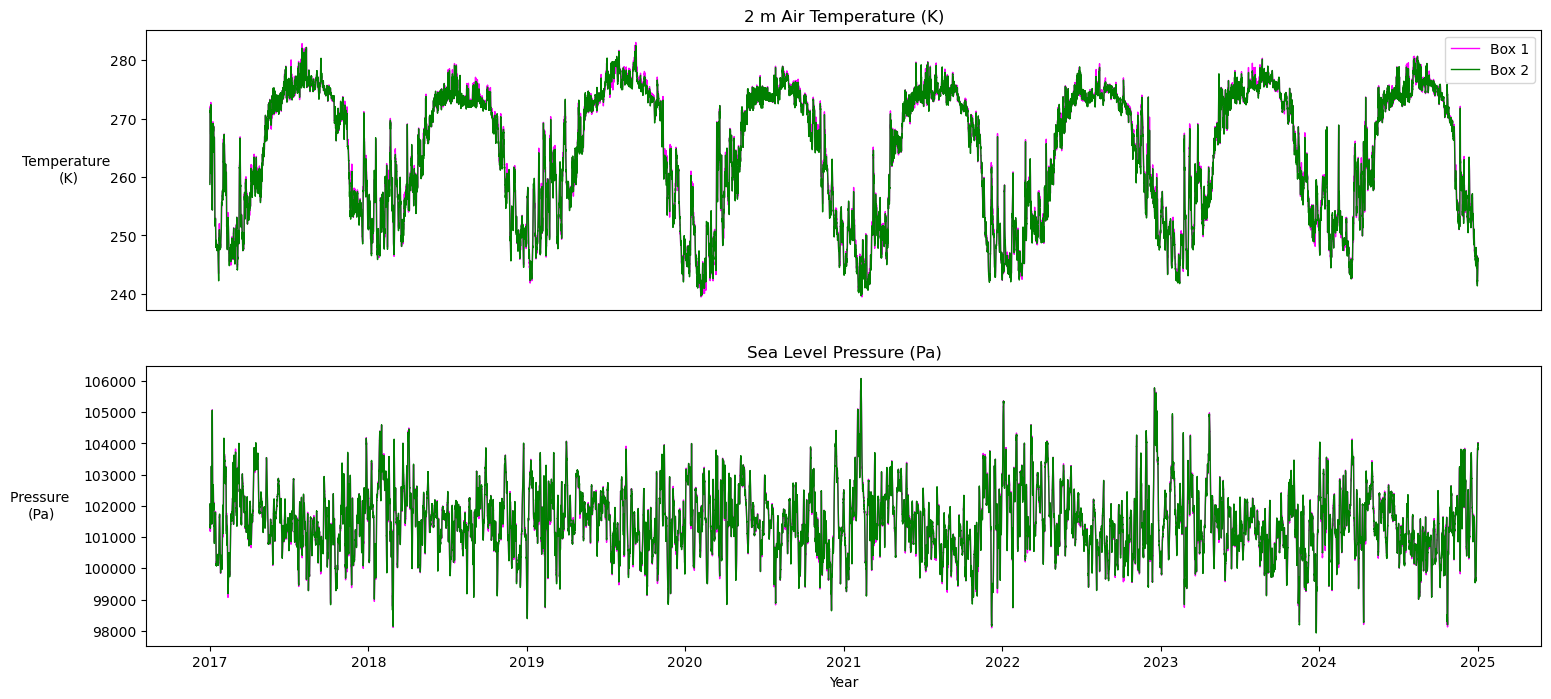

In [13]:
# Plot time series for these two regions (one panel for longwave
# and another for shortwave)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(era5_air_temp.valid_time, air_temp_reg1_avg, color='magenta', linewidth=1, label='Box 1')
ax[0].plot(era5_air_temp.valid_time, air_temp_reg2_avg, color='green', linewidth=1, label='Box 2')
ax[0].set_title('2 m Air Temperature (K)')
ax[0].set_ylabel('Temperature \n(K)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(era5_air_pres.valid_time, air_pres_reg1_avg, color='magenta', linewidth=1, label='Box 1')
ax[1].plot(era5_air_pres.valid_time, air_pres_reg2_avg, color='green', linewidth=1, label='Box 2')
ax[1].set_title('Sea Level Pressure (Pa)')
ax[1].set_ylabel('Pressure \n(Pa)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Year')

In [14]:
# For mean sea level pressure, we just want one value soooo
# take the mean over all time
msl_avg_all_time_reg1 = air_pres_reg1_avg.mean(dim='valid_time')
print('Box 1 mean sea level pressure (over time and space) (Pa): ', msl_avg_all_time_reg1.values)
msl_avg_all_time_reg2 = air_pres_reg2_avg.mean(dim='valid_time')
print('Box 2 mean sea level pressure (over time and space) (Pa): ', msl_avg_all_time_reg2.values)

Box 1 mean sea level pressure (over time and space) (Pa):  101513.68
Box 2 mean sea level pressure (over time and space) (Pa):  101519.945


In [15]:
# Convert to whatever units ROMS wants 


In [16]:
# Make a version of the plot that has the average value
# for each day of each based on all of these years

# group by hour of day of year to rpeserve that frequency

# Box 1
air_temp_reg1_avg_doy_hrly = air_temp_reg1_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
air_pres_reg1_avg_doy_hrly = air_pres_reg1_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
# Box 2
air_temp_reg2_avg_doy_hrly = air_temp_reg2_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
air_pres_reg2_avg_doy_hrly = air_pres_reg2_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')

In [17]:
# Reshape to be time series
# Dumb way would be to loop and we could just do that...
# Yup takes no time do the dumb way
# Box 1 
air_temp_reg1_avg_doy_hrly2 = np.empty((len(air_temp_reg1_avg_doy_hrly[:,0])*len(air_temp_reg1_avg_doy_hrly[0,:])))
air_pres_reg1_avg_doy_hrly2 = np.empty((len(air_pres_reg1_avg_doy_hrly[:,0])*len(air_pres_reg1_avg_doy_hrly[0,:])))
# Box 2
air_temp_reg2_avg_doy_hrly2 = np.empty((len(air_temp_reg2_avg_doy_hrly[:,0])*len(air_temp_reg2_avg_doy_hrly[0,:])))
air_pres_reg2_avg_doy_hrly2 = np.empty((len(air_pres_reg2_avg_doy_hrly[:,0])*len(air_pres_reg2_avg_doy_hrly[0,:])))

# Set the count for looping
count = 0

# Loop through day of year
for d in range(len(air_temp_reg1_avg_doy_hrly[:,0])):
    # Set the indices 
    start = count
    end = start + 24
    #print('start: ', start)
    #print('end: ', end)
 
    # Save this to the array
    # Box 1
    air_temp_reg1_avg_doy_hrly2[start:end] = air_temp_reg1_avg_doy_hrly[d,:]
    air_pres_reg1_avg_doy_hrly2[start:end] = air_pres_reg1_avg_doy_hrly[d,:]
    # Box 2
    air_temp_reg2_avg_doy_hrly2[start:end] = air_temp_reg2_avg_doy_hrly[d,:]
    air_pres_reg2_avg_doy_hrly2[start:end] = air_pres_reg2_avg_doy_hrly[d,:]

    # Increase the count
    #print('count before: ', count)
    count = count + 24
    #print('count after: ', count)

Text(0.5, 0, 'Day & Hour of Year')

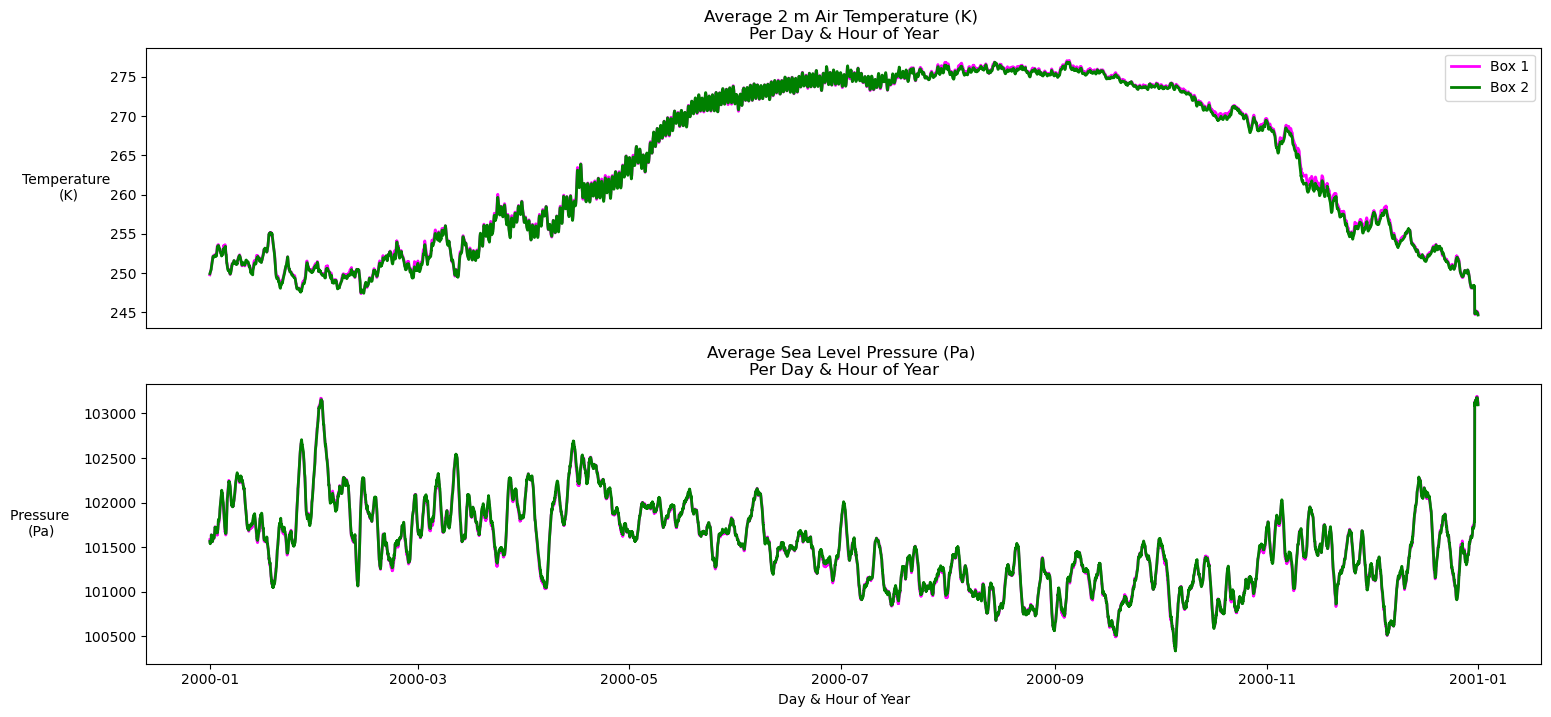

In [18]:
# Make day of year array
day_of_year = np.arange(1, 367, 1)

# Make new time index 
doy_w_hour = np.arange(1, 8785, 1)
hourly_datetimes = pd.date_range(start='2000-01-01', periods=366*24, freq='H')

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(hourly_datetimes, air_temp_reg1_avg_doy_hrly2, color='magenta', linewidth=2, label='Box 1')
ax[0].plot(hourly_datetimes, air_temp_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax[0].set_title('Average 2 m Air Temperature (K) \nPer Day & Hour of Year')
ax[0].set_ylabel('Temperature \n(K)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(hourly_datetimes, air_pres_reg1_avg_doy_hrly2, color='magenta', linewidth=2, label='Box 1')
ax[1].plot(hourly_datetimes, air_pres_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax[1].set_title('Average Sea Level Pressure (Pa) \nPer Day & Hour of Year')
ax[1].set_ylabel('Pressure \n(Pa)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day & Hour of Year')

Text(0.5, 0, 'Day & Hour of Year')

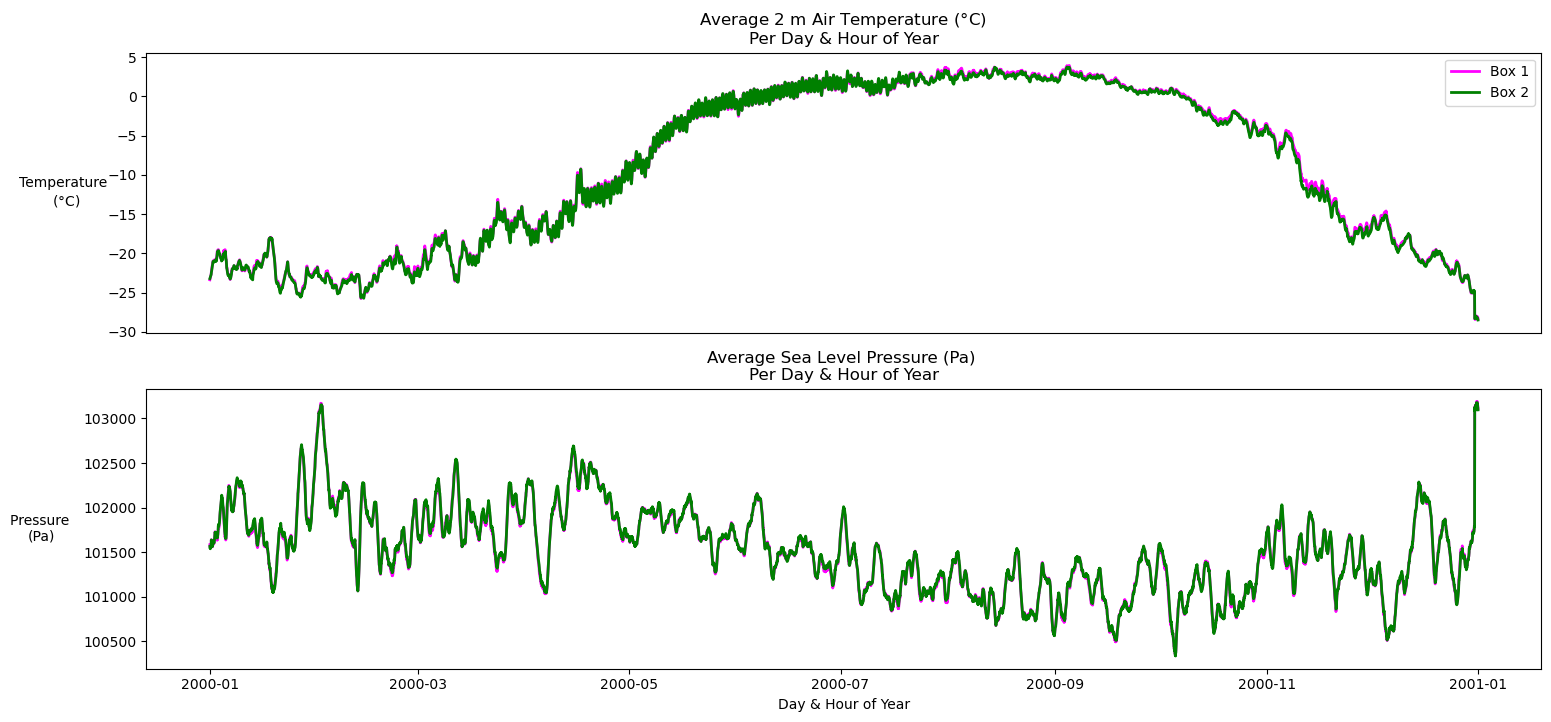

In [19]:
# Plot again but in Celsius
# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(hourly_datetimes, air_temp_reg1_avg_doy_hrly2-273.15, color='magenta', linewidth=2, label='Box 1')
ax[0].plot(hourly_datetimes, air_temp_reg2_avg_doy_hrly2-273.15, color='green', linewidth=2, label='Box 2')
ax[0].set_title('Average 2 m Air Temperature ($\degree$C) \nPer Day & Hour of Year')
ax[0].set_ylabel('Temperature \n($\degree$C)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(hourly_datetimes, air_pres_reg1_avg_doy_hrly2, color='magenta', linewidth=2, label='Box 1')
ax[1].plot(hourly_datetimes, air_pres_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax[1].set_title('Average Sea Level Pressure (Pa) \nPer Day & Hour of Year')
ax[1].set_ylabel('Pressure \n(Pa)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day & Hour of Year')

Text(0.5, 0, 'Day & Hour of Year')

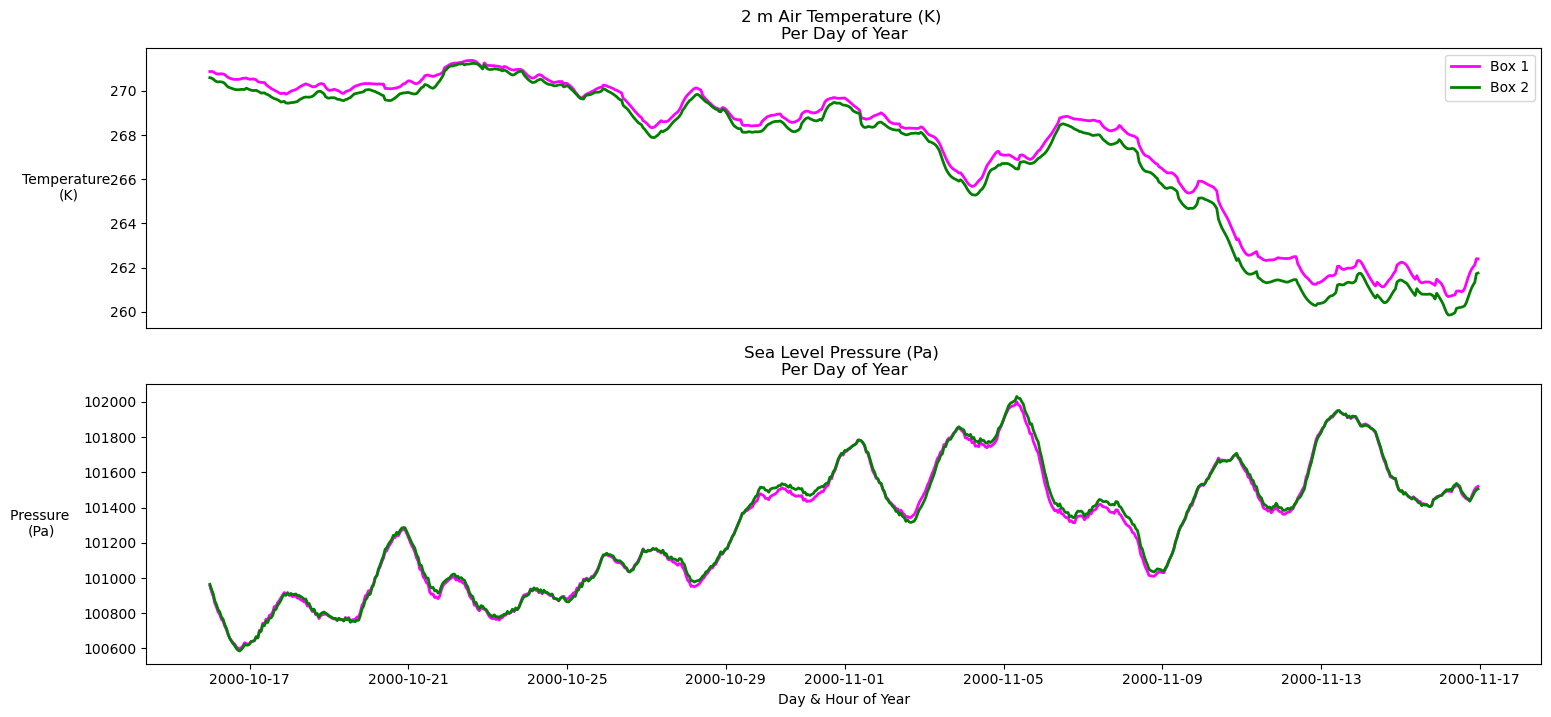

In [20]:
# Trim to just the period we want
# Plot the values around freeze-up which is mid-October to mid-November (ish)
# September 15 - October 15 = days 289 - 320 (leap year)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(hourly_datetimes[289*24:321*24], air_temp_reg1_avg_doy_hrly2[289*24:321*24], color='magenta', linewidth=2, label='Box 1')
ax[0].plot(hourly_datetimes[289*24:321*24], air_temp_reg2_avg_doy_hrly2[289*24:321*24], color='green', linewidth=2, label='Box 2')
ax[0].set_title('2 m Air Temperature (K) \nPer Day of Year')
ax[0].set_ylabel('Temperature \n(K)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(hourly_datetimes[289*24:321*24], air_pres_reg1_avg_doy_hrly2[289*24:321*24], color='magenta', linewidth=2, label='Box 1')
ax[1].plot(hourly_datetimes[289*24:321*24], air_pres_reg2_avg_doy_hrly2[289*24:321*24], color='green', linewidth=2, label='Box 2')
ax[1].set_title('Sea Level Pressure (Pa) \nPer Day of Year')
ax[1].set_ylabel('Pressure \n(Pa)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day & Hour of Year')

In [21]:
# Before fitting a sine curve to this, shift the data
# to start in mid-October to make it easier for fitting

air_temp_reg1_avg_doy_hrly2_oct_start_pt1 = air_temp_reg1_avg_doy_hrly2[((289*24)+1):]
air_temp_reg1_avg_doy_hrly2_oct_start_pt2 = air_temp_reg1_avg_doy_hrly2[:((289*24)+1)]

# Now combine/append these two parts to get a ~9 month time series 
air_temp_reg1_avg_doy_hrly2_oct_start = np.concatenate((air_temp_reg1_avg_doy_hrly2_oct_start_pt1, air_temp_reg1_avg_doy_hrly2_oct_start_pt2))

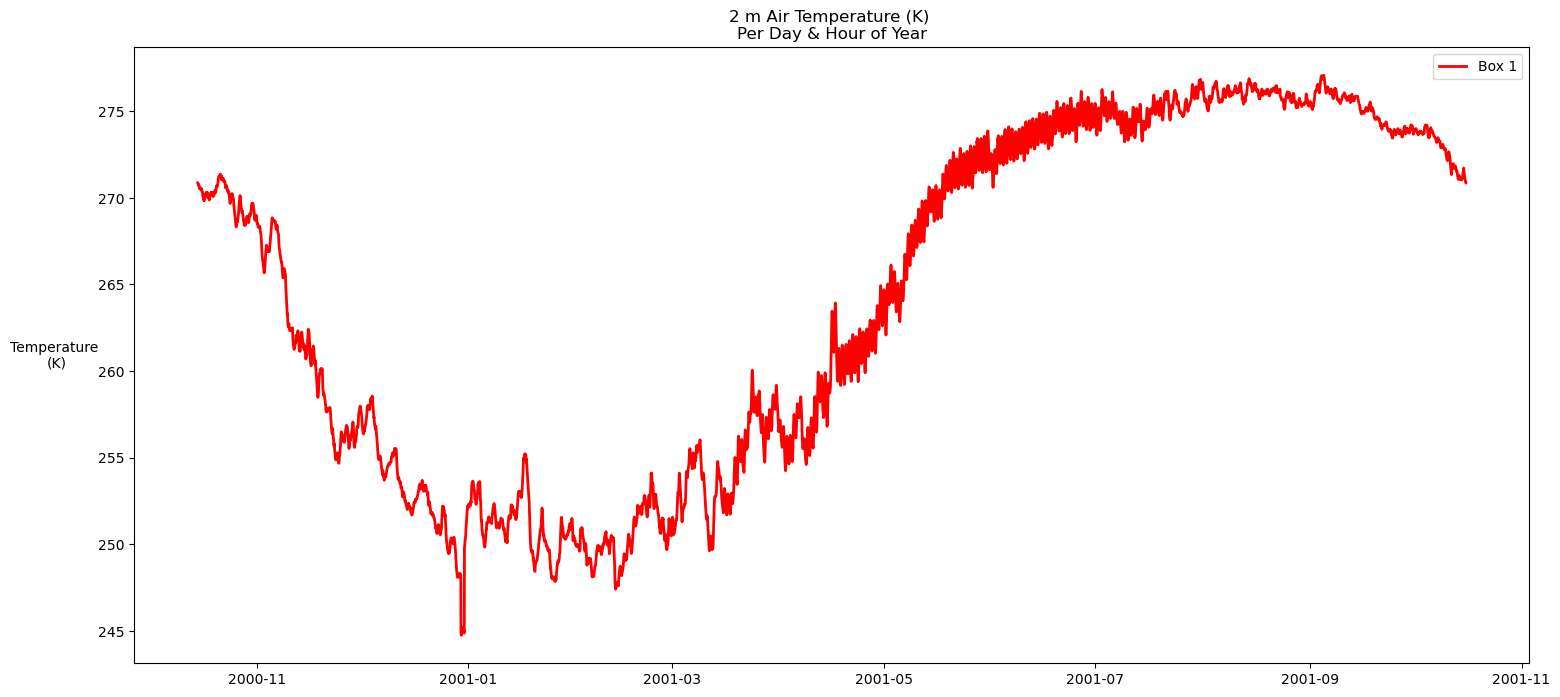

In [22]:
# Plot this to see how it looks

# Make shifted datetimes
hourly_datetimes_shifted = pd.date_range(start='2000-10-15', periods=366*24, freq='H')

# Plot the data
# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Longwave
ax.plot(hourly_datetimes_shifted, air_temp_reg1_avg_doy_hrly2_oct_start, color='red', linewidth=2, label='Box 1')

#ax.plot(hourly_datetimes, longwave_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax.set_title('2 m Air Temperature (K) \nPer Day & Hour of Year')
ax.set_ylabel('Temperature \n(K)', rotation=0, va='center', labelpad=30)
#ax.xaxis.set_visible(False)
ax.legend()

In [23]:
# For air temperature, make a sine wave fit 
# to use for idealized version
# Work on a fit...
# Focus on Box 1 since that is the one we will base everything 
# else on
from scipy.optimize import curve_fit

# Define a function to make an inital guess of a sine wave
def sine_function(x, amplitude, frequency, phase, offset):
        return amplitude * np.sin(frequency * x + phase) + offset

# Initial guess for parameters (amplitude, frequency, phase, offset)
initial_guess = [10, (1/(366*24)), 0, 260]

# Convert time to hours since initial date to help with sine fit
time0 = hourly_datetimes[0]
numeric_time = (hourly_datetimes - time0) / np.timedelta64(1, 'h')

# Calculate/Fit parameters based on real data and the initial guess
params, covariance = curve_fit(sine_function, numeric_time, air_temp_reg1_avg_doy_hrly2_oct_start, p0=initial_guess)

# Pull out the parameters
amplitude_fit, frequency_fit, phase_fit, offset_fit = params

# Use these new parameters to make a new sine function that fits the data
y_fit = sine_function(numeric_time, amplitude_fit, frequency_fit, phase_fit, offset_fit)

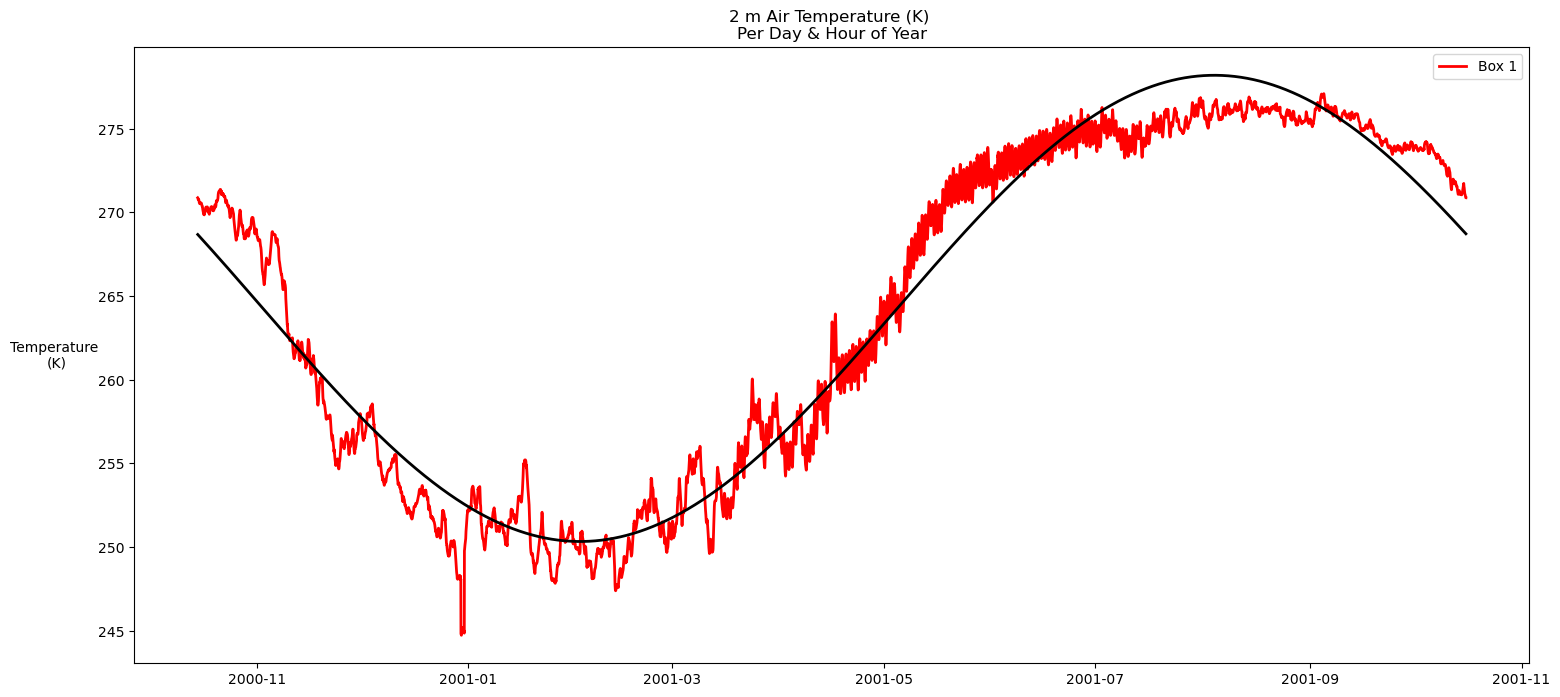

In [24]:
# Plot to see how this looks 

# Plot the data
# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Longwave
ax.plot(hourly_datetimes_shifted, air_temp_reg1_avg_doy_hrly2_oct_start, color='red', linewidth=2, label='Box 1')
ax.plot(hourly_datetimes_shifted, y_fit, color='black', linewidth=2)

#ax.plot(hourly_datetimes, longwave_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax.set_title('2 m Air Temperature (K) \nPer Day & Hour of Year')
ax.set_ylabel('Temperature \n(K)', rotation=0, va='center', labelpad=30)
#ax.xaxis.set_visible(False)
ax.legend()

In [25]:
# I don't really see big diurnal cycles in these plots 
# (ocean has large heat capacity...could be related) but 
# make version with diurnal cycle in case? Just to have?

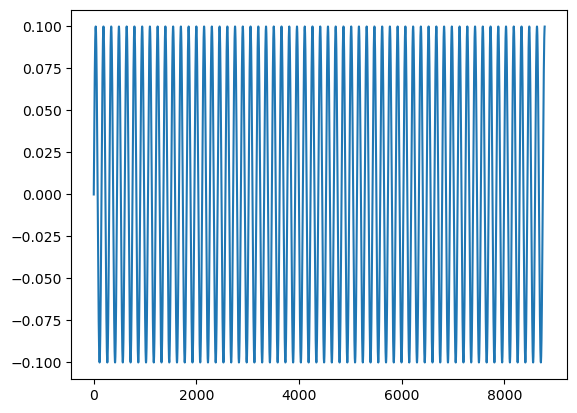

In [26]:
# Now take this curve and add daily variations of noise onto it
# Make a new sine wave that represents this wave and add them 
# together 
# You can adjust the amplitude of this "diurnal noise"
diurnal_amplitude = 0.1 # 2, 3

# def sine_function(x, amplitude, frequency, phase, offset):
#         return amplitude * np.sin(frequency * x + phase) + offset

# Make a curve from this 
diurnal_air_temp = diurnal_amplitude * np.sin((1/(24))*numeric_time)

# diurnal_noise = diurnal_amplitude * np.sin(2 * np.pi * 1 * numeric_time + np.random.uniform(0, 2*np.pi)) # Add slight phase randomization
plt.plot(diurnal_air_temp)

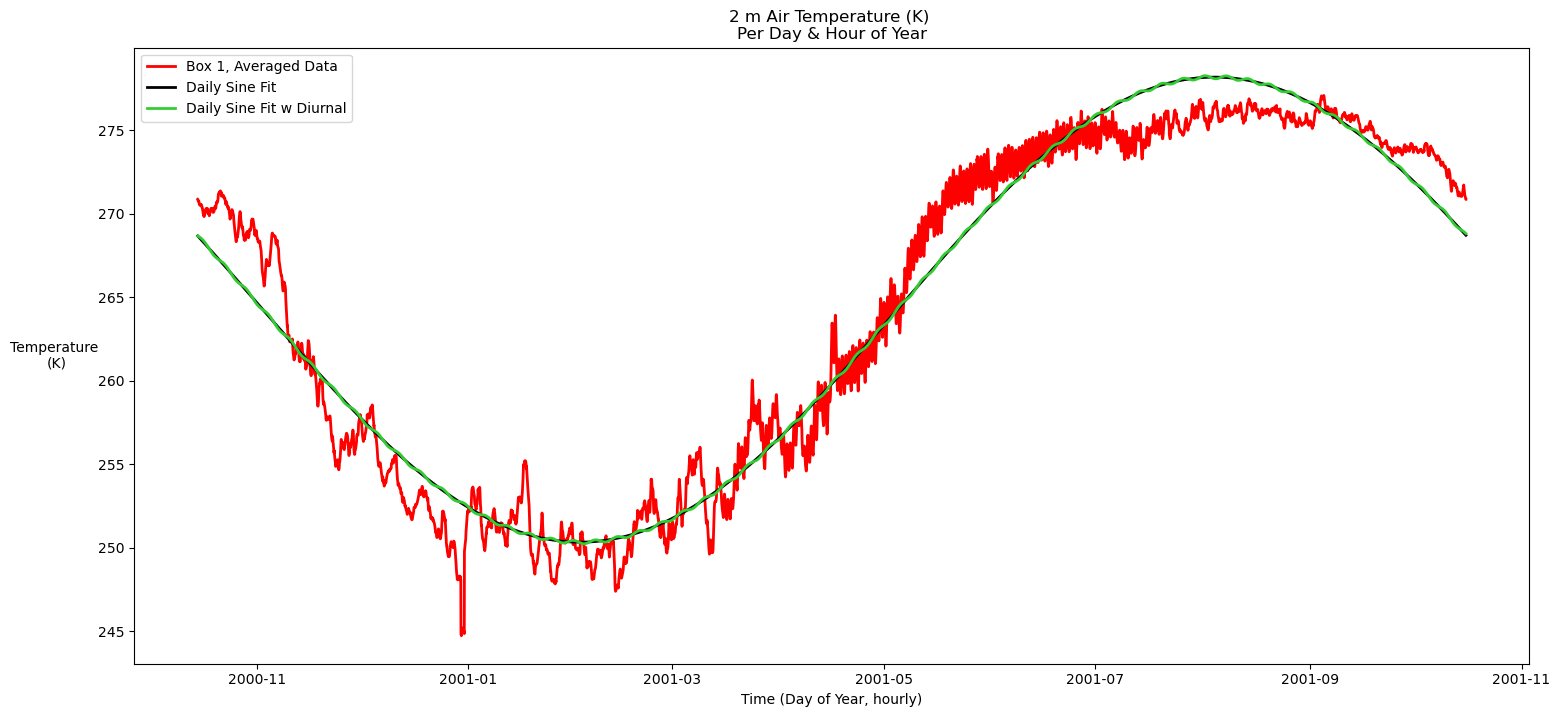

In [27]:
# NOw make a plot with these added together

# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Air temp
ax.plot(hourly_datetimes_shifted, air_temp_reg1_avg_doy_hrly2_oct_start, color='red', linewidth=2, label='Box 1, Averaged Data')
ax.plot(hourly_datetimes_shifted, y_fit, color='black', linewidth=2, label='Daily Sine Fit')
ax.plot(hourly_datetimes_shifted, y_fit+diurnal_air_temp, color='limegreen', linewidth=2, label='Daily Sine Fit w Diurnal')

#ax.plot(hourly_datetimes, longwave_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax.set_title('2 m Air Temperature (K) \nPer Day & Hour of Year')
ax.set_ylabel('Temperature \n(K)', rotation=0, va='center', labelpad=30)
ax.set_xlabel('Time (Day of Year, hourly)')
#ax.xaxis.set_visible(False)
ax.legend()

In [28]:
# Now pull out 9 months starting at October
# (shifted above so no need to shift here)
sine_fit_no_diurnal_reg1 = y_fit
idealized_air_temp_reg1 = sine_fit_no_diurnal_reg1[:((289*24)+1)]

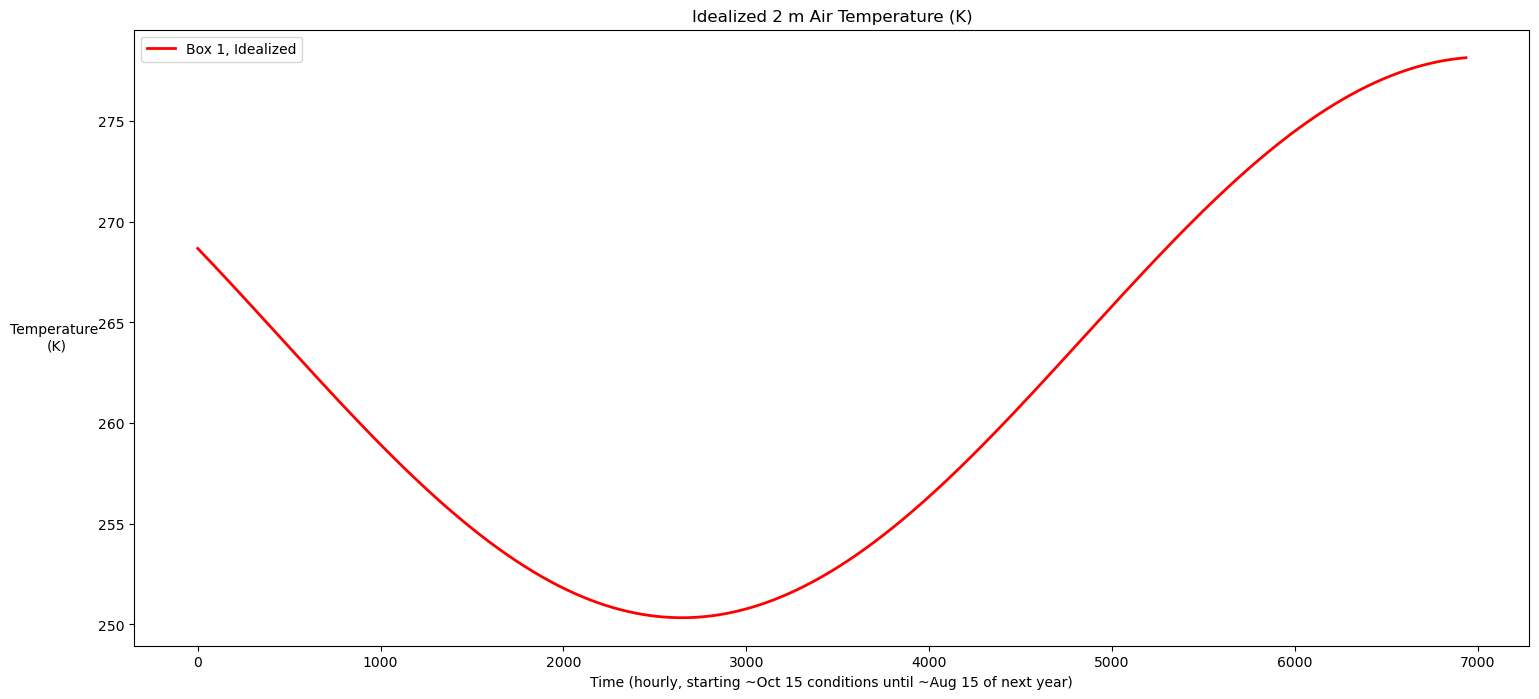

In [29]:
# Plot the idealized forcing 
# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Longwave
ax.plot(idealized_air_temp_reg1, color='red', linewidth=2, label='Box 1, Idealized')
ax.set_title('Idealized 2 m Air Temperature (K)')
ax.set_ylabel('Temperature \n(K)', rotation=0, va='center', labelpad=30)
ax.set_xlabel('Time (hourly, starting ~Oct 15 conditions until ~Aug 15 of next year)')
#ax.xaxis.set_visible(False)
ax.legend()

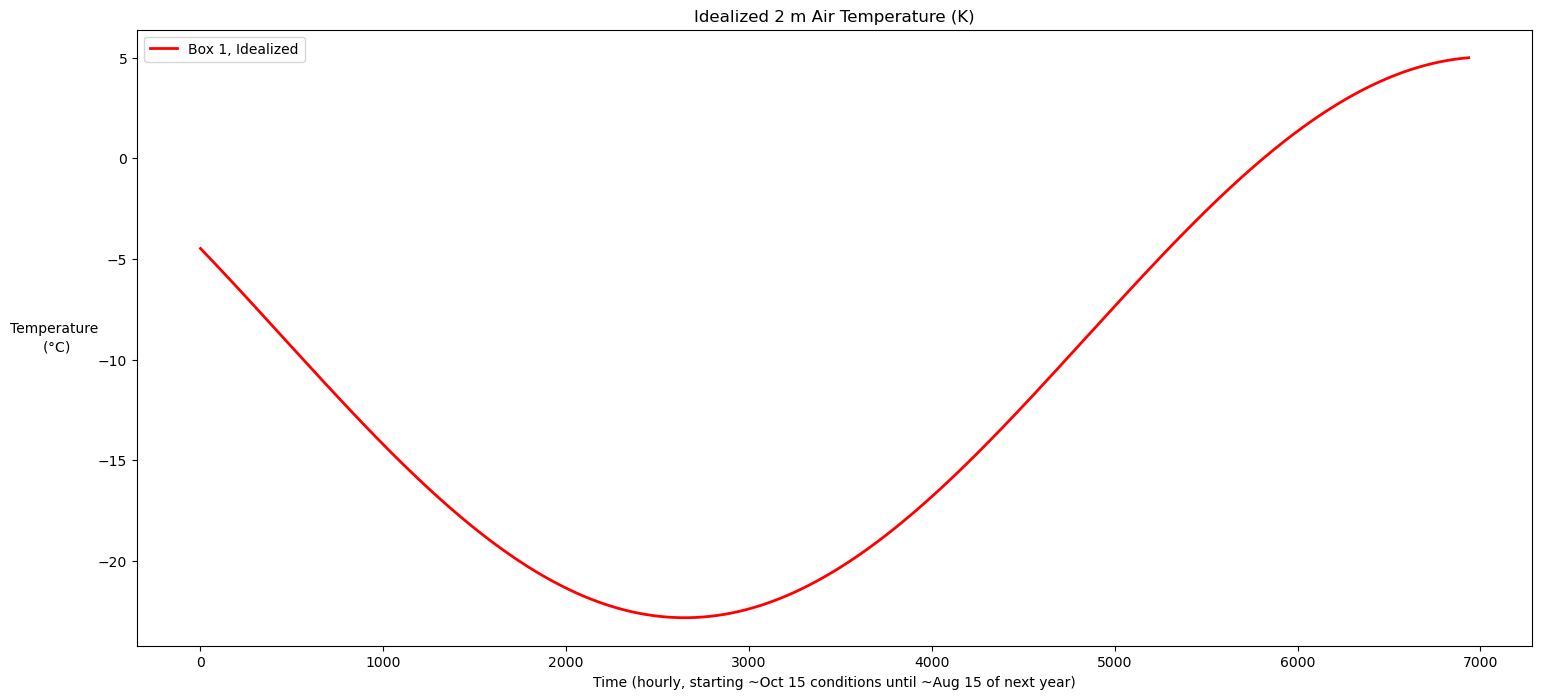

In [30]:
# Plot again in Celsius
# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Longwave
ax.plot(idealized_air_temp_reg1-273.15, color='red', linewidth=2, label='Box 1, Idealized')
ax.set_title('Idealized 2 m Air Temperature (K)')
ax.set_ylabel('Temperature \n($\degree$C)', rotation=0, va='center', labelpad=30)
ax.set_xlabel('Time (hourly, starting ~Oct 15 conditions until ~Aug 15 of next year)')
#ax.xaxis.set_visible(False)
ax.legend()

In [31]:
# Now prep things to make a ROMS forcing file

### Set up the NetCDF  

The idealized model does not have any ties to lat/lon so the data can just be given in grid space rather than lat/lon and does not need to be interpolated or anything since it is spatially uniform. So we need to load the in the grid and then maybe remake this file any time you remake the grid.

In [32]:
# Load in the idealized model grid to get the dimensions 
# 500 m
#grid = xr.open_dataset('/global/homes/b/bundzis/Projects/Beaufort_ROMS_idealized_jet/Include/grd_500_m.nc')
# 1 km
grid = xr.open_dataset('/global/homes/b/bundzis/Projects/Beaufort_ROMS_idealized_jet/Include/grd_1km_002.nc')

In [33]:
grid

<xarray.Dataset> Size: 6MB
Dimensions:      (eta_rho: 252, xi_rho: 202, eta_psi: 251, xi_psi: 201,
                  eta_u: 252, xi_u: 201, eta_v: 251, xi_v: 202)
Dimensions without coordinates: eta_rho, xi_rho, eta_psi, xi_psi, eta_u, xi_u,
                                eta_v, xi_v
Data variables: (12/18)
    x_rho        (eta_rho, xi_rho) float64 407kB ...
    y_rho        (eta_rho, xi_rho) float64 407kB ...
    x_psi        (eta_psi, xi_psi) float64 404kB ...
    y_psi        (eta_psi, xi_psi) float64 404kB ...
    x_u          (eta_u, xi_u) float64 405kB ...
    y_u          (eta_u, xi_u) float64 405kB ...
    ...           ...
    angle        (eta_rho, xi_rho) float64 407kB ...
    spherical    bool 1B ...
    xl           float64 8B ...
    el           float64 8B ...
    visc_factor  (eta_rho, xi_rho) float64 407kB ...
    diff_factor  (eta_rho, xi_rho) float64 407kB ...

In [34]:
# Pull out grid dimensions 
# Read in the dimensions
# rho
eta_rho_len = len(grid.eta_rho) # 206
xi_rho_len = len(grid.xi_rho) # 608
print('eta_rho_len: ', eta_rho_len)
print('xi_rho_len: ', xi_rho_len)
# u
eta_u_len = len(grid.eta_u) # 206
xi_u_len = len(grid.xi_u) # 607
print('eta_u_len: ', eta_u_len)
print('xi_u_len: ', xi_u_len)
# v
eta_v_len = len(grid.eta_v) #
xi_v_len = len(grid.xi_v) # 
print('eta_v_len: ', eta_v_len)
print('xi_v_len: ', xi_v_len)

# Define other dimension lengths
# eta rho
Mp = len(grid.eta_rho)
# xi rho
Lp = len(grid.xi_rho)
print('Mp: ', Mp)
print('Lp: ', Lp)

# # latitude
# lat_u_len = len(grid.lat_u)
# lat_v_len = len(grid.lat_v)
# print('lat_u_len: ', lat_u_len)
# print('lat_v_len: ', lat_v_len)

# # longitude
# lon_u_len = len(grid.lon_u)
# lon_v_len = len(grid.lon_v)
# print('lon_u_len: ', lon_u_len)
# print('lon_v_len: ', lon_v_len)

eta_rho_len:  252
xi_rho_len:  202
eta_u_len:  252
xi_u_len:  201
eta_v_len:  251
xi_v_len:  202
Mp:  252
Lp:  202


In [35]:
# Need to make a time that is hours since some reference time 
# Get the length of time for the data

# convert all the times to seconds since the first time step so it is on generic time)
#time_tmp = ((hourly_datetimes_shifted[:] - datetime(0,12,31)).total_seconds() - 86400)
time_tmp_1 = ((hourly_datetimes_shifted[:] - hourly_datetimes_shifted[0]).total_seconds())
# Trim to just the time we want
time_tmp = time_tmp_1[:len(idealized_air_temp_reg1)]
# Get the length from this 
# time
time_len = len(time_tmp)

In [36]:
time_tmp

Index([       0.0,     3600.0,     7200.0,    10800.0,    14400.0,    18000.0,
          21600.0,    25200.0,    28800.0,    32400.0,
       ...
       24937200.0, 24940800.0, 24944400.0, 24948000.0, 24951600.0, 24955200.0,
       24958800.0, 24962400.0, 24966000.0, 24969600.0],
      dtype='float64', length=6937)

In [37]:
print('len time_tmp: ', len(time_tmp))
print('len hourly_datetimes_shifted: ', len(hourly_datetimes_shifted))
print('len idealized_air_temp_reg1: ', len(idealized_air_temp_reg1))

len time_tmp:  6937
len hourly_datetimes_shifted:  8784
len idealized_air_temp_reg1:  6937


In [38]:
# Make a version of the code that is this shape and same everywhere
idealized_air_temp_reg1_ongrid = np.empty((time_len, eta_rho_len, xi_rho_len))

# Loop through space and fill with the idealized version
for y in range(eta_rho_len):
    for x in range(xi_rho_len):
        idealized_air_temp_reg1_ongrid[:,y,x] = idealized_air_temp_reg1

# Could insert a check for this at some point...

In [39]:
# Check units - should be C
print('ERA5 air temperature units: ', era5_air_temp.t2m.units)

# So convert to Celsius from Kelvin 
idealized_air_temp_reg1_ongrid_cel = idealized_air_temp_reg1_ongrid - 273.15

# Check to see if this worked
print('OG Kelvin: ', idealized_air_temp_reg1_ongrid[10,10,10])
print('OG Celsius: ', idealized_air_temp_reg1_ongrid[10,10,10]-273.15)
print('New Celsius: ', idealized_air_temp_reg1_ongrid_cel[10,10,10])


ERA5 air temperature units:  K
OG Kelvin:  268.5792159386808
OG Celsius:  -4.570784061319159
New Celsius:  -4.570784061319159


In [40]:
# Make the netcdf for the forcing file 

# ------------------------------- Create the netCDF file ---------------------------

#name of file I am writing to
# 500 m
#tair_frc = '/pscratch/sd/b/bundzis/Beaufort_ROMS_idealized_jet_scratch/Forcing_files/idealized_tair_forcing_500m_001.nc'   #UPDATE PATH
# 1 km
tair_frc = '/pscratch/sd/b/bundzis/Beaufort_ROMS_idealized_jet_scratch/Forcing_files/idealized_tair_forcing_1km_002.nc'   #UPDATE PATH

#create file to write to
nc1 = Dataset(tair_frc, 'w', format='NETCDF4')

#Global attributes
global_defaults = dict(gridname = '*.nc',
                      type = 'ROMS grid shaped ERA5 idealized air temperature forcing',
                      history = 'Created by Brianna Undzis',
                      Conventions = 'CF',
                      Institution = 'University of Colorado Boulder',
                      date = str(datetime.today()))
    
#create dictionary for model
d = {}
d = global_defaults

for att, value in d.items():
    setattr(nc1, att, value)

# Create dimensions
nc1.createDimension('xi_rho',  xi_rho_len)   # rho
nc1.createDimension('eta_rho', eta_rho_len)
# nc1.createDimension('lon',  era5_lon_len)   # rho
# nc1.createDimension('lat', era5_lat_len)
nc1.createDimension('tair_time', None)
nc1.createDimension('one',     1)

# Create variables 
# --------------------
# Coordinate Variables
# --------------------
# # era5 lon
# lon = nc1.createVariable('lon', 'd', ('lon',), zlib=True)
# lon.long_name = 'longitude coordinate of ERA5 data'
# lon.standard_name = 'projection_lon_coordinate'
# lon.units = 'degrees'
# lon_tmp = era5_longwave.longitude
# lon[:] = lon_tmp[:]

# # era5 lat
# lat = nc1.createVariable('lat', 'd', ('lat',), zlib=True)
# lat.long_name = 'latitude coordinate of ERA5 data'
# lat.standard_name = 'projection_lat_coordinate'
# lat.units = 'degrees'
# #lat_tmp = era5_longwave.latitude
# lat_tmp = lat_flip # FLIP
# lat[:] = lat_tmp[:]

# xi rho
xi_rho = nc1.createVariable('xi_rho', 'd', ('xi_rho',), zlib=True)
xi_rho.long_name = 'xi coordinate of RHO-points'
xi_rho.standard_name = 'projection_xi_coordinate'
xi_rho.units = 'meter'
xi_rho_tmp = np.arange(0, Lp)
xi_rho[:] = xi_rho_tmp[:]

# eta rho
eta_rho = nc1.createVariable('eta_rho', 'd', ('eta_rho',), zlib=True)
eta_rho.long_name = 'eta coordinate of RHO-points'
eta_rho.standard_name = 'projection_eta_coordinate'
eta_rho.units = 'meter'
eta_rho_tmp = np.arange(0, Mp)
eta_rho[:] = eta_rho_tmp[:]

# tair_time (in seconds)
tair_time_g = nc1.createVariable('tair_time', None, ('tair_time'), zlib=True)
tair_time_g.long_name = 'seconds since 0001-01-01 00:00:00' #with initialization of 2000-01-01 00:00:00
tair_time_g.units = 'second'
tair_time_g.field = 'time, scalar, series'
tair_time_g[:] = time_tmp[:]


# --------------------
# Atmospheric Variables 
# --------------------

# Tair
tair_interp_g = nc1.createVariable('Tair', 'f8', ('tair_time', 'eta_rho', 'xi_rho'), zlib=True, fill_value=1e30)
tair_interp_g.long_name = 'surface_air_temperature'
tair_interp_g.standard_name = 'surface_air_temperature'
tair_interp_g.units = 'Celsius' 
tair_interp_g.coordinates = 'eta_rho xi_rho' 
tair_interp_g[:,:,:] = idealized_air_temp_reg1_ongrid_cel[:,:,:]


nc1.close()
# ------------------------------- End netCDF ---------------------------